# 包导入

In [142]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 数据导入

In [147]:
stone  = pd.read_excel("stone.xlsx")
print("护石:")
print(stone.head())
print("基本信息: ")
print(stone.info())

护石:
   等级      一技能  Lv    二技能  Lv.1   孔  value
0   7  火属性攻击强化   1     不屈   1.0  21      0
1   6     昏厥耐性   2    击晕术   1.0  11      0
2   5      植生学   1  毒属性强化   2.0  11      0
3   6     风压耐性   1    击晕术   1.0  11      0
4   7       逆袭   2     利刃   1.0   1      1
基本信息: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
等级       2700 non-null int64
一技能      2700 non-null object
Lv       2700 non-null int64
二技能      2419 non-null object
Lv.1     2419 non-null float64
孔        2700 non-null int64
value    2700 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 147.7+ KB
None


In [148]:
skill = pd.read_excel("skill.xlsx")
print("技能:")
print(skill.head())
print(skill.info())

技能:
  LookUpName  MaxLevel
0         攻击         7
1        挑战者         5
2         无伤         3
3         怨恨         5
4       死里逃生         3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
LookUpName    113 non-null object
MaxLevel      113 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None


# 数据预处理

In [149]:
# 处理缺失值
stone.fillna({"二技能":"无","Lv.1":0},inplace=True)

#处理技能,将技能名称用数字替换
skillArray = skill["LookUpName"].values
stone['一技能'].replace(skillArray,list(range(1,114)),inplace=True)
stone['二技能'].replace(skillArray,list(range(1,114)),inplace=True)
stone.head(10)

,等级,一技能,Lv,二技能,Lv.1,孔,value
0,7,13,1,93,1.0,21,0
1,6,77,2,41,1.0,11,0
2,5,80,1,18,2.0,11,0
3,6,63,1,41,1.0,11,0
4,7,107,2,23,1.0,1,1
5,4,40,3,16,1.0,0,0
6,6,68,2,70,1.0,21,0
7,5,71,1,13,2.0,11,0
8,5,18,2,54,1.0,1,0
9,7,77,1,63,1.0,21,0


# 数据分析

查看可用护石的占比

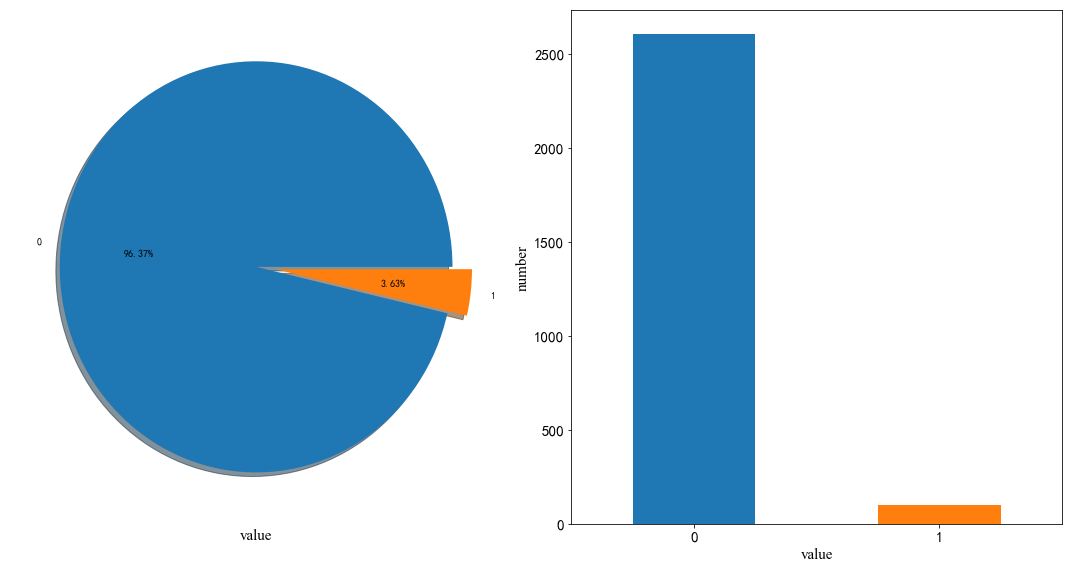

In [182]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}

fig,ax=plt.subplots(1,2,figsize=(15,8))
stone['value'].value_counts().plot.pie(ax=ax[0],shadow=True,explode=[0,0.1],autopct='%.2f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('value',font1)

stone['value'].value_counts().plot.bar(ax=ax[1])
ax[1].set_ylabel('number',font1)
ax[1].set_xlabel('value',font1)
#设置相关信息
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

等级与value的关系

7    839
5    775
6    578
4    353
3    155
Name: 等级, dtype: int64


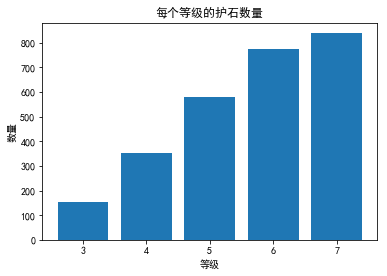

In [151]:
#每种等级的数量
lv_value = stone["等级"].value_counts()
print(lv_value)
plt.bar(stone["等级"].unique(),lv_value)
plt.xlabel("等级")
plt.ylabel("数量")
plt.title("每个等级的护石数量")
plt.show()

等级
7    80
6    11
5     7
4     0
3     0
Name: value, dtype: int64


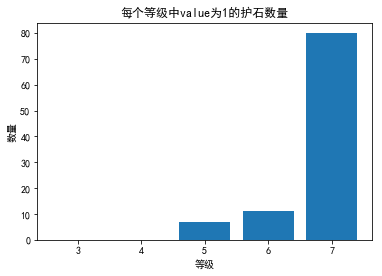

In [183]:
#每种等级中value为1的数量
lv_value2 = stone.groupby('等级')["value"].sum().iloc[::-1]
print(lv_value2)
#绘制
plt.bar(stone["等级"].unique(),lv_value2)
plt.xlabel("等级")
plt.ylabel("数量")
plt.title("每个等级中value为1的护石数量")
plt.show()

In [187]:
#比较每个等级中value为1的占比
temp= lv_value2 / lv_value
temp

3    0.000000
4    0.000000
5    0.009032
6    0.019031
7    0.095352
dtype: float64

value与技能的关系

In [167]:
stone[['一技能']].describe()

,一技能
count,2700.000000
mean,57.489259
std,29.750679
min,1.000000
25%,33.000000
50%,61.000000
75%,80.000000
max,109.000000


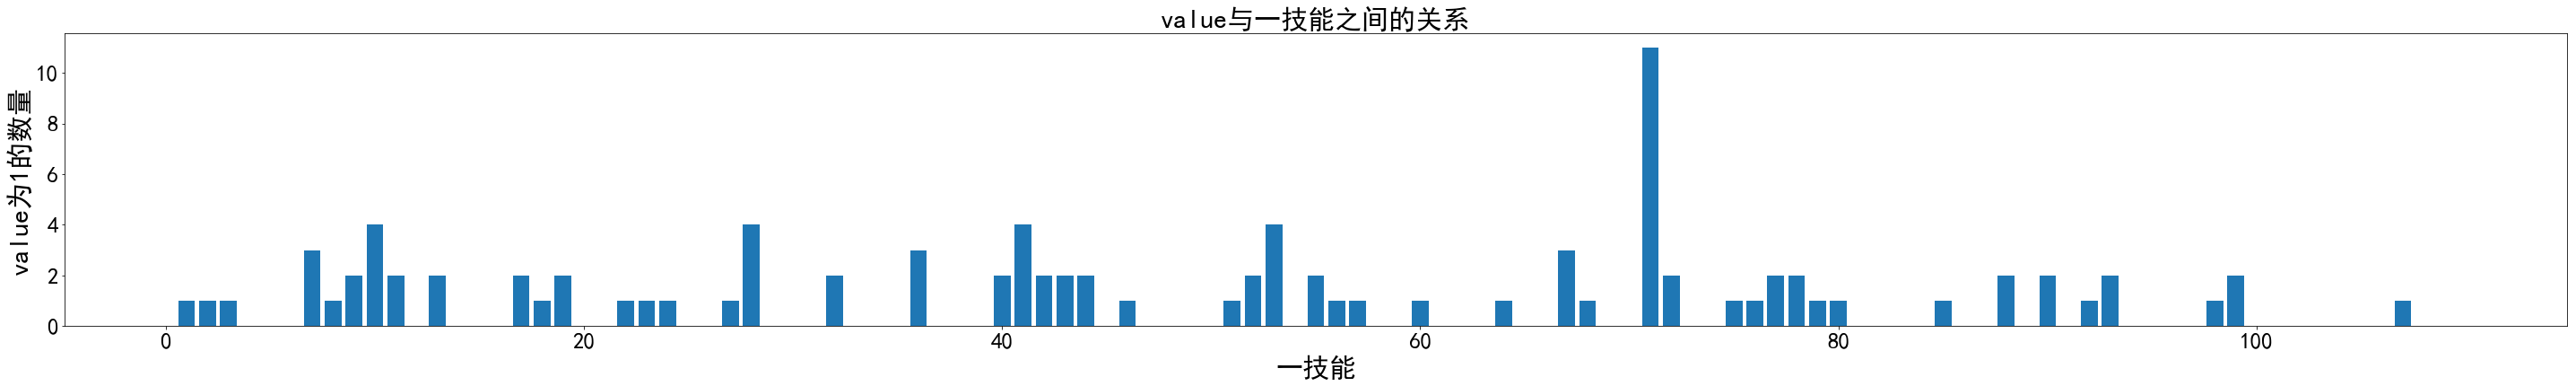

In [179]:
stone.groupby('一技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["一技能"].unique(),stone.groupby('一技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与一技能之间的关系",fontsize = 30)
plt.xlabel("一技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

In [184]:
stone[['二技能']].describe()

,二技能
count,2700.000000
mean,62.564074
std,33.032751
min,1.000000
25%,39.000000
50%,64.000000
75%,90.000000
max,113.000000


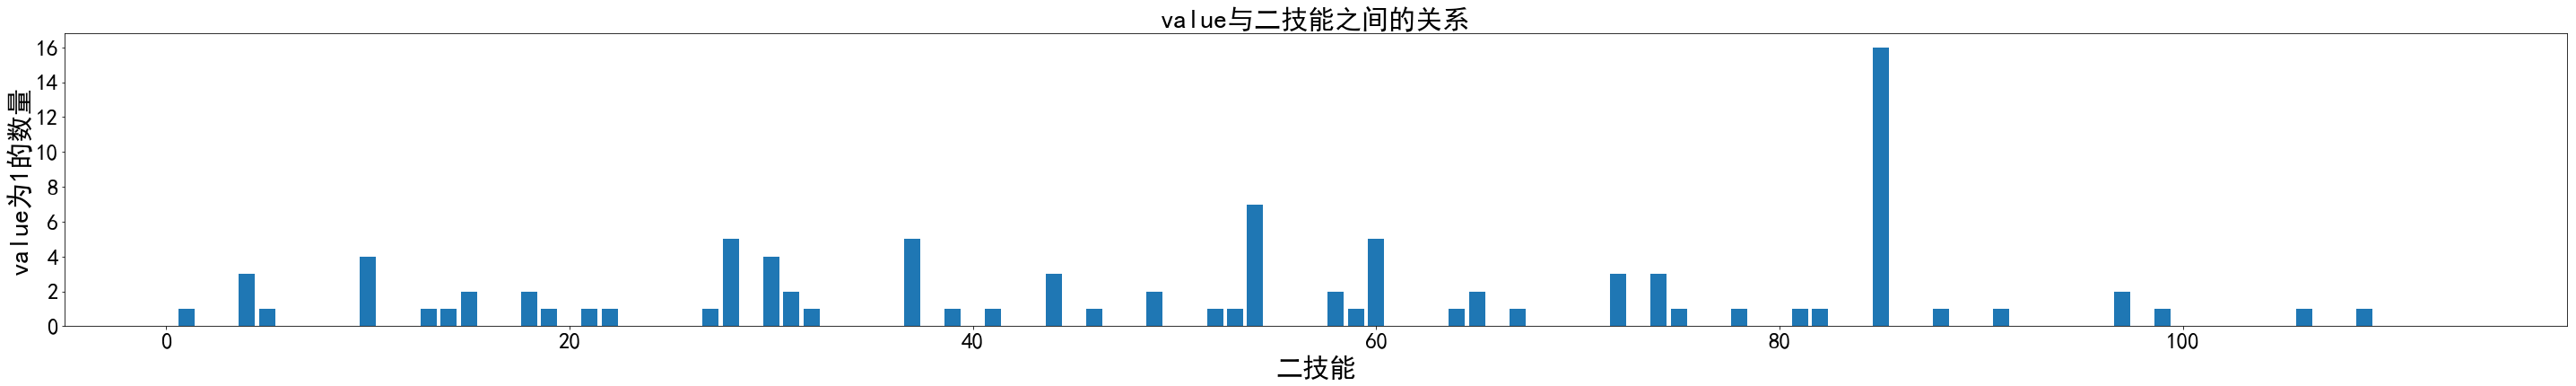

In [185]:
stone.groupby('二技能')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["二技能"].unique(),stone.groupby('二技能')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与二技能之间的关系",fontsize = 30)
plt.xlabel("二技能",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

孔与value的关系

# 模型一尝试

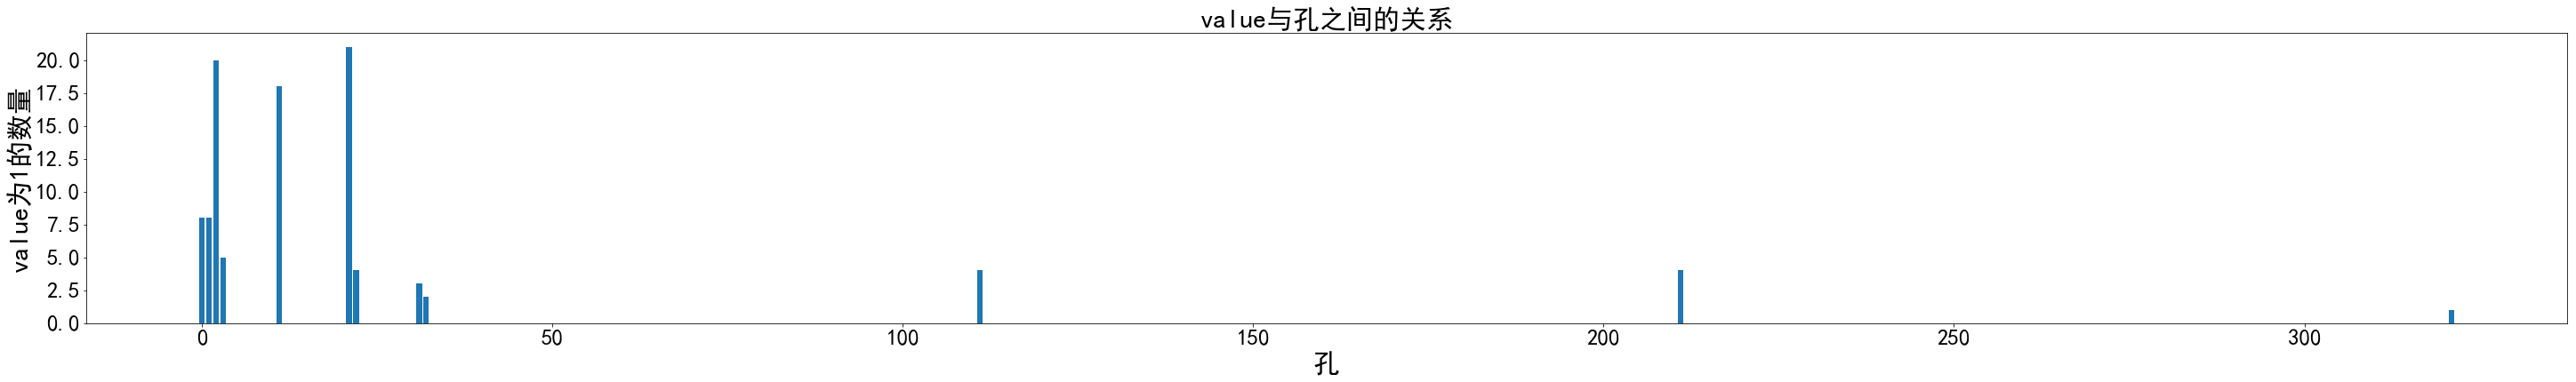

In [188]:
stone.groupby('孔')['value'].sum()
plt.figure(figsize = (50,6))
plt.bar(stone["孔"].unique(),stone.groupby('孔')['value'].sum())
plt.xticks(fontsize=25,rotation=0)
plt.yticks(fontsize=25)
plt.title("value与孔之间的关系",fontsize = 30)
plt.xlabel("孔",fontsize = 30)
plt.ylabel("value为1的数量",fontsize = 30)
plt.show()

# 模型二尝试

# 模型三尝试